In [200]:
import os

folder_prod = os.listdir("../con blur/Con produccion")
folder_sin_prod = os.listdir("../con blur/Sin produccion")



In [46]:
#File con Produccion

bd=sqlContext.read.format("com.databricks.spark.csv").option("header","false").load(
"file:/home/luca/Desktop/Tecnocom/csvs/Con produccion/"+str(folder_prod[0]))

df_prod = bd.toPandas().transpose().reset_index()
df_prod = df_prod.drop(columns="index")


,0
0,90041
1,41551
2,22537
3,21953
4,19385
...,...
690,3319
691,3999
692,3485
693,3113


In [59]:
#File sin produccion
bd2 = sqlContext.read.format("com.databricks.spark.csv").option("header","false").load(
    "file:/home/luca/Desktop/Tecnocom/csvs/Sin produccion/"+str(folder_sin_prod[0]))

df_sin_prod = bd2.toPandas().transpose().reset_index()
df_sin_prod = df_sin_prod.drop(columns="index")



NameError: name 'df_sin_prod' is not defined

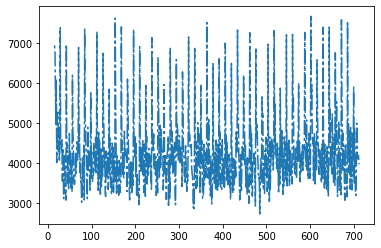

In [196]:
import matplotlib.pyplot as plt

x = df_prod.index.values[15:].astype(int)
y = df_prod[0].values[15:].astype(float)

fig, ax = plt.subplots()

line1 = ax.plot(x , y, dashes=[2, 2, 10, 2], label="Produccion")
#line1.set_dashes([2, 2, 10, 2])

x = df_sin_prod.index.values[15:].astype(int).min()
y = df_sin_prod[0].values[15:].astype(float).min()

line2 = ax.plot(x, y, dashes=[6, 2], label="Sin produccion")

ax.legend()
plt.show()

In [85]:
spark = SparkSession.builder.appName('dfp').getOrCreate()

dfp = spark.createDataFrame(df_sin_prod)


<class 'pyspark.sql.dataframe.DataFrame'>


In [89]:
dfp.

root
 |-- 0: string (nullable = true)

